In [4]:
import osmnx as ox, geopandas as gpd
import pandas as pd
import numpy as np

In [5]:
gdf = gpd.read_file("Data/wegdelen-shape.gpkg")

In [6]:
gdf.head()

,ogc_fid,functiecd,functie,fysvoorkcd,fysvoorkmn,fysvkplscd,fysvkmplus,id,guid,code,...,verharding,gebrfuncd,gebrfuncti,situering,groenwpkcd,groenwrkpk,straatnmcd,straatnaam,counter,geometry
0,1,RLW,rijbaan lokale weg,OVH,open verharding,OVH_BSS,betonstraatstenen,168707.0,{0A528910-2CCB-2B6B-E053-293C0B0A6175},100995,...,Betonsteen keiformaat,2a-SH,Stedelijke Hoofdweg,Links,None,None,10960,Lozerlaan,1.0,"MULTIPOLYGON (((76567.558 450918.408, 76573.06..."
1,2,RLW,rijbaan lokale weg,OVH,open verharding,OVH_BSS,betonstraatstenen,168708.0,{0A528910-2CF7-2B6B-E053-293C0B0A6175},100996,...,Betonsteen keiformaat,2a-SH,Stedelijke Hoofdweg,Links,None,None,10960,Lozerlaan,2.0,"MULTIPOLYGON (((76664.8 450855.858, 76663.595 ..."
2,3,VTP,voetpad,OVH,open verharding,OVH_TGL,tegels,168710.0,{0A528910-2F4E-2B6B-E053-293C0B0A6175},90545,...,Betontegel 30*30,4-WO,Wijkontsluitingsweg,Rechts,None,None,10807,Loosduinse Hoofdstraat,3.0,"MULTIPOLYGON (((75612.327 452150.147, 75612.31..."
3,4,RLW,rijbaan lokale weg,OVH,open verharding,OVH_GBK,gebakken klinkers,168711.0,{0A528910-364C-2B6B-E053-293C0B0A6175},26112,...,Klinker keiformaat,5-WS,Woon- cq Wijkstraat,Totale breedte,None,None,4090,Domburglaan,4.0,"MULTIPOLYGON (((75115.951 453706.193, 75111.40..."
4,5,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,168719.0,{0A528910-365A-2B6B-E053-293C0B0A6175},26128,...,Asfaltbeton,2b-SH,S-route,Rechts,None,None,11210,Machiel Vrijenhoeklaan,5.0,"MULTIPOLYGON (((75416.687 453839.502, 75406.21..."


In [5]:
gdf.columns

Index(['ogc_fid', 'functiecd', 'functie', 'fysvoorkcd', 'fysvoorkmn',
       'fysvkplscd', 'fysvkmplus', 'id', 'guid', 'code', 'identifica',
       'tijdreg', 'op_talud', 'bouwjaar', 'leeftijd', 'oppervlakt', 'nummer',
       'lengte', 'breedte', 'buurtcode', 'buurt', 'stadsdlcd', 'stadsdeel',
       'wijkcode', 'wijk', 'wegvak_id', 'typeondrcd', 'typeondrdl',
       'vrhrdingcd', 'verharding', 'gebrfuncd', 'gebrfuncti', 'situering',
       'groenwpkcd', 'groenwrkpk', 'straatnmcd', 'straatnaam', 'counter',
       'geometry'],
      dtype='object')

In [27]:
gdf.wijk.unique()

array(['Loosduinen', 'Kijkduin en Ockenburgh', 'Bohemen en Meer en Bos',
       'Kraayenstein en Vroondaal', 'Waldeck', 'Vogelwijk', 'Bouwlust',
       'Leidschenveen', 'Bomen- en Bloemenbuurt', 'Ypenburg', 'Hoornwijk',
       'Forepark', 'Vruchtenbuurt', 'Leyenburg', 'Mariahoeve en Marlot',
       'Laakkwartier en Spoorwijk', 'Benoordenhout', 'Stationsbuurt',
       'Bezuidenhout', 'Transvaalkwartier', 'Schildersbuurt', None,
       'Groente- en Fruitmarkt', 'Binckhorst', 'Haagse Bos', 'Centrum',
       'Zeeheldenkwartier', 'Willemspark', 'Archipelbuurt', 'Duinoord',
       'Westbroekpark en Duttendel', 'Rustenburg en Oostbroek',
       'Regentessekwartier', 'Van Stolkpark en Scheveningse Bosjes',
       'Duindorp', 'Valkenboskwartier', 'Zorgvliet', 'Oostduinen',
       'Belgisch Park', 'Scheveningen', 'Geuzen- en Statenkwartier',
       'Zuiderpark', 'Morgenstond', 'Moerwijk', 'Wateringse Veld'],
      dtype=object)

In [48]:
Area = gdf[gdf["wijk"].isin(["Zorgvliet", 'Geuzen- en Statenkwartier', 'Van Stolkpark en Scheveningse Bosjes', 'Duinoord'])].reset_index()

In [49]:
gdf.functie.unique()

array(['rijbaan lokale weg', 'voetpad', 'fietspad', 'voetgangersgebied',
       'parkeervlak', 'OV-baan', 'woonerf', 'ruiterpad', 'inrit'],
      dtype=object)

In [50]:
Area = Area[~Area["functie"].isin(["voetpad", "fietspad", "parkeervlak", 'voetgangersgebied', 'OV-baan', 'ruiterpad'])].reset_index()

In [51]:
Area.columns

Index(['level_0', 'index', 'ogc_fid', 'functiecd', 'functie', 'fysvoorkcd',
       'fysvoorkmn', 'fysvkplscd', 'fysvkmplus', 'id', 'guid', 'code',
       'identifica', 'tijdreg', 'op_talud', 'bouwjaar', 'leeftijd',
       'oppervlakt', 'nummer', 'lengte', 'breedte', 'buurtcode', 'buurt',
       'stadsdlcd', 'stadsdeel', 'wijkcode', 'wijk', 'wegvak_id', 'typeondrcd',
       'typeondrdl', 'vrhrdingcd', 'verharding', 'gebrfuncd', 'gebrfuncti',
       'situering', 'groenwpkcd', 'groenwrkpk', 'straatnmcd', 'straatnaam',
       'counter', 'geometry'],
      dtype='object')

In [52]:
Area = Area[["gebrfuncti", 'lengte', "breedte", "wijk", "verharding", "straatnaam", "situering", "geometry"]].copy()

In [53]:
Area

,gebrfuncti,lengte,breedte,wijk,verharding,straatnaam,geometry
0,S-route,160.0,7.34,Van Stolkpark en Scheveningse Bosjes,Asfaltbeton,Professor B. M. Teldersweg,"MULTIPOLYGON (((79738.944 457037.664, 79705.98..."
1,Woon- cq Wijkstraat,99.0,9.51,Van Stolkpark en Scheveningse Bosjes,Asfaltbeton,Van Stolkweg,"MULTIPOLYGON (((79592.247 457061.854, 79624.43..."
2,S-route,79.0,12.02,Zorgvliet,Asfaltbeton,Johan de Wittlaan,"MULTIPOLYGON (((79554.026 456923.253, 79548.74..."
3,(Winkel) promenade,2.0,10.02,Geuzen- en Statenkwartier,Betonsteen keiformaat,Bentinckstraat,"MULTIPOLYGON (((78902.34 456856.691, 78908.583..."
4,Wijkontsluitingsweg,2.0,13.10,Geuzen- en Statenkwartier,Rood asfalt,Van Boetzelaerlaan,"MULTIPOLYGON (((78551.145 457025.563, 78555.64..."
...,...,...,...,...,...,...,...
2338,Sdl Ontsluitingsweg,2.0,10.08,Zorgvliet,Rood asfalt,Stadhouderslaan,"MULTIPOLYGON (((79128.781 456065.157, 79122.52..."
2339,Sdl Ontsluitingsweg,2.0,10.08,Zorgvliet,Rood asfalt,Stadhouderslaan,"MULTIPOLYGON (((79128.781 456065.157, 79122.52..."
2340,Woon- cq Wijkstraat,2.0,14.90,Zorgvliet,Betontegel 30*30,Stadhouderslaan,"MULTIPOLYGON (((79169.561 456040.924, 79172.50..."
2341,Woon- cq Wijkstraat,2.0,14.90,Zorgvliet,Betontegel 30*30,Stadhouderslaan,"MULTIPOLYGON (((79169.561 456040.924, 79172.50..."


In [54]:
Area.gebrfuncti.unique()

array(['S-route', 'Woon- cq Wijkstraat', '(Winkel) promenade',
       'Wijkontsluitingsweg', 'Fietspaden', 'Sdl Ontsluitingsweg',
       'Stedelijke Hoofdweg', 'Woonerf', 'Grote groengebieden',
       'Kleine groengebieden', None], dtype=object)

In [55]:
Area = Area[~(Area["gebrfuncti"] == 'Fietspaden')].reset_index(drop=True)

In [56]:
Area[Area["gebrfuncti"] == 'None']

,gebrfuncti,lengte,breedte,wijk,verharding,straatnaam,geometry


In [57]:
Area[~Area["gebrfuncti"].isin(['S-route', 'Woon- cq Wijkstraat', '(Winkel) promenade',
       'Wijkontsluitingsweg', 'Sdl Ontsluitingsweg',
       'Stedelijke Hoofdweg', 'Woonerf', 'Grote groengebieden',
       'Kleine groengebieden', ])]

,gebrfuncti,lengte,breedte,wijk,verharding,straatnaam,geometry
2051,None,2.0,7.05,Geuzen- en Statenkwartier,Asfaltbeton,Van Aerssenstraat,"MULTIPOLYGON (((78920.991 457195.587, 78925.39..."


In [36]:
Area[Area["straatnaam"] == "Van Aerssenstraat"]

,gebrfuncti,lengte,breedte,wijk,verharding,straatnaam,geometry
72,Woon- cq Wijkstraat,67.0,6.19,Geuzen- en Statenkwartier,Asfaltbeton,Van Aerssenstraat,"MULTIPOLYGON (((78606.898 456742.914, 78604.70..."
180,Woon- cq Wijkstraat,77.0,6.18,Geuzen- en Statenkwartier,Asfaltbeton,Van Aerssenstraat,"MULTIPOLYGON (((78980.66 457235.901, 78951.207..."
202,Woon- cq Wijkstraat,4.0,2.99,Geuzen- en Statenkwartier,Betonsteen keiformaat,Van Aerssenstraat,"MULTIPOLYGON (((78627.756 456797.617, 78626.37..."
213,Woon- cq Wijkstraat,74.0,6.55,Geuzen- en Statenkwartier,Asfaltbeton,Van Aerssenstraat,"MULTIPOLYGON (((78842.155 457114.268, 78830.28..."
300,Woon- cq Wijkstraat,19.0,7.13,Geuzen- en Statenkwartier,Asfaltbeton,Van Aerssenstraat,"MULTIPOLYGON (((78765.352 457029.458, 78761.97..."
722,Woon- cq Wijkstraat,3.0,2.88,Geuzen- en Statenkwartier,Betonsteen keiformaat,Van Aerssenstraat,"MULTIPOLYGON (((78577.598 456700.916, 78576.07..."
850,Woon- cq Wijkstraat,3.0,1.98,Geuzen- en Statenkwartier,Betonsteen keiformaat,Van Aerssenstraat,"MULTIPOLYGON (((78745.815 457008.143, 78744.68..."
851,Woon- cq Wijkstraat,3.0,2.65,Geuzen- en Statenkwartier,Betonsteen keiformaat,Van Aerssenstraat,"MULTIPOLYGON (((78742.981 457003.06, 78741.446..."
852,Woon- cq Wijkstraat,3.0,1.99,Geuzen- en Statenkwartier,Betonsteen keiformaat,Van Aerssenstraat,"MULTIPOLYGON (((78676.168 456883.792, 78675.06..."
853,Woon- cq Wijkstraat,3.0,2.07,Geuzen- en Statenkwartier,Betonsteen keiformaat,Van Aerssenstraat,"MULTIPOLYGON (((78748.745 456994.279, 78747.59..."


In [58]:
Area.loc[2103,"gebrfuncti"] = "Woon- cq Wijkstraat"

In [40]:
Area[Area["gebrfuncti"] == "(Winkel) promenade"]

,gebrfuncti,lengte,breedte,wijk,verharding,straatnaam,geometry
3,(Winkel) promenade,2.0,10.02,Geuzen- en Statenkwartier,Betonsteen keiformaat,Bentinckstraat,"MULTIPOLYGON (((78902.34 456856.691, 78908.583..."
36,(Winkel) promenade,3.0,3.58,Geuzen- en Statenkwartier,Betontegel 30*30,Westduinweg,"MULTIPOLYGON (((78400.933 456982.213, 78398.56..."
366,(Winkel) promenade,49.0,2.90,Geuzen- en Statenkwartier,Klinker dikformaat,Willem de Zwijgerlaan,"MULTIPOLYGON (((78691.55 456424.205, 78720.428..."
367,(Winkel) promenade,28.0,3.86,Geuzen- en Statenkwartier,Klinker dikformaat,Willem de Zwijgerlaan,"MULTIPOLYGON (((78582.95 456432.42, 78582.679 ..."
393,(Winkel) promenade,2.0,3.58,Duinoord,Betonsteen keiformaat,2e Schuytstraat,"MULTIPOLYGON (((79350.554 455479.317, 79350.98..."
398,(Winkel) promenade,66.0,6.51,Geuzen- en Statenkwartier,Klinker dikformaat,Frederik Hendriklaan,"MULTIPOLYGON (((78771.889 456493.93, 78751.976..."
766,(Winkel) promenade,50.0,7.53,Geuzen- en Statenkwartier,Klinker dikformaat,Frederik Hendriklaan,"MULTIPOLYGON (((78831.006 456607.854, 78824.87..."
768,(Winkel) promenade,3.0,2.42,Geuzen- en Statenkwartier,Betonsteen keiformaat,Van Slingelandtstraat,"MULTIPOLYGON (((78735.765 456563.757, 78734.53..."
769,(Winkel) promenade,2.0,7.17,Geuzen- en Statenkwartier,Betonsteen keiformaat,Van Beverningkstraat,"MULTIPOLYGON (((78684.764 456621.443, 78681.87..."
783,(Winkel) promenade,20.0,8.48,Geuzen- en Statenkwartier,Klinker dikformaat,Willem de Zwijgerlaan,"MULTIPOLYGON (((78809.408 456421.608, 78809.74..."


In [64]:
Area[Area["gebrfuncti"] == "Sdl Ontsluitingsweg"]

,gebrfuncti,lengte,breedte,wijk,verharding,straatnaam,geometry,speed
37,Sdl Ontsluitingsweg,14.0,5.65,Duinoord,Betontegel 30*30,Koningin Emmakade,"MULTIPOLYGON (((79552.31 455467.713, 79558.856...",0
38,Sdl Ontsluitingsweg,2.0,16.08,Duinoord,Rood asfalt,Koningin Emmakade,"MULTIPOLYGON (((79554.509 455467.447, 79557.78...",0
53,Sdl Ontsluitingsweg,2.0,11.57,Duinoord,Rood asfalt,Waldeck Pyrmontkade,"MULTIPOLYGON (((79460.483 455646.04, 79466.984...",0
113,Sdl Ontsluitingsweg,25.0,7.00,Geuzen- en Statenkwartier,Asfaltbeton,Westduinweg,"MULTIPOLYGON (((78128.178 456566.541, 78123.55...",0
114,Sdl Ontsluitingsweg,17.0,3.87,Geuzen- en Statenkwartier,Asfaltbeton,Westduinweg,"MULTIPOLYGON (((78117.008 456543.99, 78112.444...",0
...,...,...,...,...,...,...,...,...
2177,Sdl Ontsluitingsweg,3.0,1.09,Geuzen- en Statenkwartier,Betonsteen keiformaat,Houtrustweg,"MULTIPOLYGON (((78112.574 456480.359, 78112.09...",0
2203,Sdl Ontsluitingsweg,3.0,8.43,Zorgvliet,Rood asfalt,Stadhouderslaan,"MULTIPOLYGON (((79153.33 456080.61, 79144.834 ...",0
2204,Sdl Ontsluitingsweg,3.0,8.43,Zorgvliet,Rood asfalt,Stadhouderslaan,"MULTIPOLYGON (((79153.33 456080.61, 79144.834 ...",0
2205,Sdl Ontsluitingsweg,2.0,10.08,Zorgvliet,Rood asfalt,Stadhouderslaan,"MULTIPOLYGON (((79128.781 456065.157, 79122.52...",0


In [67]:
Area[Area["gebrfuncti"] == "Sdl Ontsluitingsweg"].verharding.value_counts()

verharding
Betontegel afwijkend     28
Rood asfalt              16
Betontegel 30*30         10
Asfaltbeton              10
Gemengde bestrating       8
Klinker dikformaat        5
Betonsteen keiformaat     1
Name: count, dtype: int64

In [68]:
Area = Area[~(Area["verharding"] == 'Rood asfalt')].reset_index(drop=True)

Weet niet zeker of Sdl ontluitingsweg nou 50 of 30 is. Maar voor zekerheid 50. Lijkt vanwege soort verharding 50 kmh grootste deel van de tijd.

In [39]:
Area.gebrfuncti.unique()

array(['S-route', 'Woon- cq Wijkstraat', '(Winkel) promenade',
       'Wijkontsluitingsweg', 'Sdl Ontsluitingsweg',
       'Stedelijke Hoofdweg', 'Woonerf', 'Grote groengebieden',
       'Kleine groengebieden'], dtype=object)

(Winkel) promenade Is niet altijd 30 kmh maar wel vaak!!!

In [59]:
kmh15 = ['Grote groengebieden','Kleine groengebieden']
kmh30 = ["Wijkontsluitingsweg", 'Woon- cq Wijkstraat', "Woonerf", "(Winkel) promenade"]
kmh50 = ["Stedelijke Hoofdweg", 'S-route', 'Sdl Ontsluitingsweg']

In [60]:
Area["speed"] = 0

In [69]:
Area.loc[Area["gebrfuncti"].isin(kmh15), "speed"] = 15
Area.loc[Area["gebrfuncti"].isin(kmh30), "speed"] = 30
Area.loc[Area["gebrfuncti"].isin(kmh50), "speed"] = 50

In [70]:
Area

,gebrfuncti,lengte,breedte,wijk,verharding,straatnaam,geometry,speed
0,S-route,160.0,7.34,Van Stolkpark en Scheveningse Bosjes,Asfaltbeton,Professor B. M. Teldersweg,"MULTIPOLYGON (((79738.944 457037.664, 79705.98...",50
1,Woon- cq Wijkstraat,99.0,9.51,Van Stolkpark en Scheveningse Bosjes,Asfaltbeton,Van Stolkweg,"MULTIPOLYGON (((79592.247 457061.854, 79624.43...",30
2,S-route,79.0,12.02,Zorgvliet,Asfaltbeton,Johan de Wittlaan,"MULTIPOLYGON (((79554.026 456923.253, 79548.74...",50
3,(Winkel) promenade,2.0,10.02,Geuzen- en Statenkwartier,Betonsteen keiformaat,Bentinckstraat,"MULTIPOLYGON (((78902.34 456856.691, 78908.583...",30
4,Woon- cq Wijkstraat,122.0,7.93,Zorgvliet,Klinker keiformaat,Adriaan Goekooplaan,"MULTIPOLYGON (((79486.437 456525.782, 79486.87...",30
...,...,...,...,...,...,...,...,...
2133,S-route,16.0,0.80,Zorgvliet,Asfaltbeton,Stadhouderslaan,"MULTIPOLYGON (((79283.373 455858.002, 79286.68...",50
2134,S-route,16.0,0.80,Zorgvliet,Asfaltbeton,Stadhouderslaan,"MULTIPOLYGON (((79283.373 455858.002, 79286.68...",50
2135,Woon- cq Wijkstraat,2.0,14.90,Zorgvliet,Betontegel 30*30,Stadhouderslaan,"MULTIPOLYGON (((79169.561 456040.924, 79172.50...",30
2136,Woon- cq Wijkstraat,2.0,14.90,Zorgvliet,Betontegel 30*30,Stadhouderslaan,"MULTIPOLYGON (((79169.561 456040.924, 79172.50...",30


<Axes: >

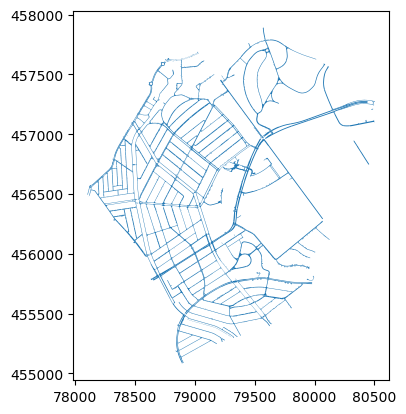

In [92]:
Area.plot()

In [64]:
Area.iloc[1]

level_0                                                      13
index                                                     50129
ogc_fid                                                   50130
functiecd                                                   RLW
functie                                      rijbaan lokale weg
fysvoorkcd                                                  GVH
fysvoorkmn                                  gesloten verharding
fysvkplscd                                              GVH_ASF
fysvkmplus                                               asfalt
id                                                     671539.0
guid                     {0A528910-49F1-2B6B-E053-293C0B0A6175}
code                                                      36556
identifica           G0518.08D6E6F2-8840-653A-E050-2A0A313C2FF8
tijdreg                                          20190612115647
op_talud                                                     Ja
bouwjaar                                

In [75]:
belangrijkste_weg = Area[Area["straatnaam"].isin(["Johan de Wittlaan"]) ].reset_index(drop = True)

In [76]:
belangrijkste_weg

,level_0,index,ogc_fid,functiecd,functie,fysvoorkcd,fysvoorkmn,fysvkplscd,fysvkmplus,id,...,verharding,gebrfuncd,gebrfuncti,situering,groenwpkcd,groenwrkpk,straatnmcd,straatnaam,counter,geometry
0,15,50196,50197,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,671510.0,...,Asfaltbeton,2b-SH,S-route,Links,None,None,8480,Johan de Wittlaan,50197.0,"MULTIPOLYGON (((79554.026 456923.253, 79548.74..."
1,26,50899,50900,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,672151.0,...,Asfaltbeton,5-WS,Woon- cq Wijkstraat,Links,None,None,8480,Johan de Wittlaan,50900.0,"MULTIPOLYGON (((79389.799 456219.328, 79428.86..."
2,37,50922,50923,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,672153.0,...,Asfaltbeton,2b-SH,S-route,Rechts,None,None,8480,Johan de Wittlaan,50923.0,"MULTIPOLYGON (((79334.086 456327.614, 79334.10..."
3,38,50923,50924,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,672154.0,...,Asfaltbeton,2b-SH,S-route,Links,None,None,8480,Johan de Wittlaan,50924.0,"MULTIPOLYGON (((79351.851 456337.471, 79348.82..."
4,120,51147,51148,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,672262.0,...,Asfaltbeton,2b-SH,S-route,Rechts,None,None,8480,Johan de Wittlaan,51148.0,"MULTIPOLYGON (((79441.396 456709.512, 79441.00..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,4846,121220,121203,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,4764128.0,...,Asfaltbeton,5-WS,Woon- cq Wijkstraat,Rechts,None,None,8480,Johan de Wittlaan,121203.0,"MULTIPOLYGON (((79449.825 456192.136, 79452.75..."
59,4996,122396,122373,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,4764121.0,...,Asfaltbeton,5-WS,Woon- cq Wijkstraat,Rechts,None,None,8480,Johan de Wittlaan,122373.0,"MULTIPOLYGON (((79538.608 456115.35, 79544.31 ..."
60,5823,134917,134914,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,4947205.0,...,Rood asfalt,7-FP,Fietspaden,Links,None,None,8480,Johan de Wittlaan,134914.0,"MULTIPOLYGON (((79559.711 456074.358, 79568.39..."
61,5827,135014,135011,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,6098859.0,...,Rood asfalt,7-FP,Fietspaden,Rechts,None,None,8480,Johan de Wittlaan,135011.0,"MULTIPOLYGON (((79355.059 456484.257, 79352.79..."


<Axes: >

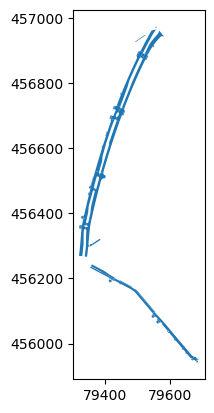

In [77]:
belangrijkste_weg.plot()